# Explore here

In [8]:
# Your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

archivo="https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

df_original = pd.read_csv(archivo, sep=",")
df = pd.read_csv(archivo, sep=",")

datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Contamos con {num_duplicados} datos duplicados")
print()

df_duplicados = df[duplicados]

df_sin_duplicados = df.drop_duplicates()

df=df_sin_duplicados

# Obtener información sobre tipos de datos y valores no nulos
df.info()
df.head()


Contamos con 1338 cantidad de datos y 7 atributos.

Contamos con 1 datos duplicados

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Contamos con 1.338 datos de clientes y 7 atributos.
- 1 dato de cliente está duplicado. Al eliminarlo resulta un total de 1.337 clientes.
- Ninguno de los atributos posee valores nulos.
- 4 características son numéricas y 3 características son categóricas. Queremos predecir la el valor de la prima que está descripta en la variable numérica nominada como "charges".

### Selección de atributos relevantes

Todos los atributos son relevantes para nuestro objetivo.

### Análisis univariante

Variables Categóricas: 
- sex: female/male
- smoker: yes/no
- region

In [9]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [10]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [11]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

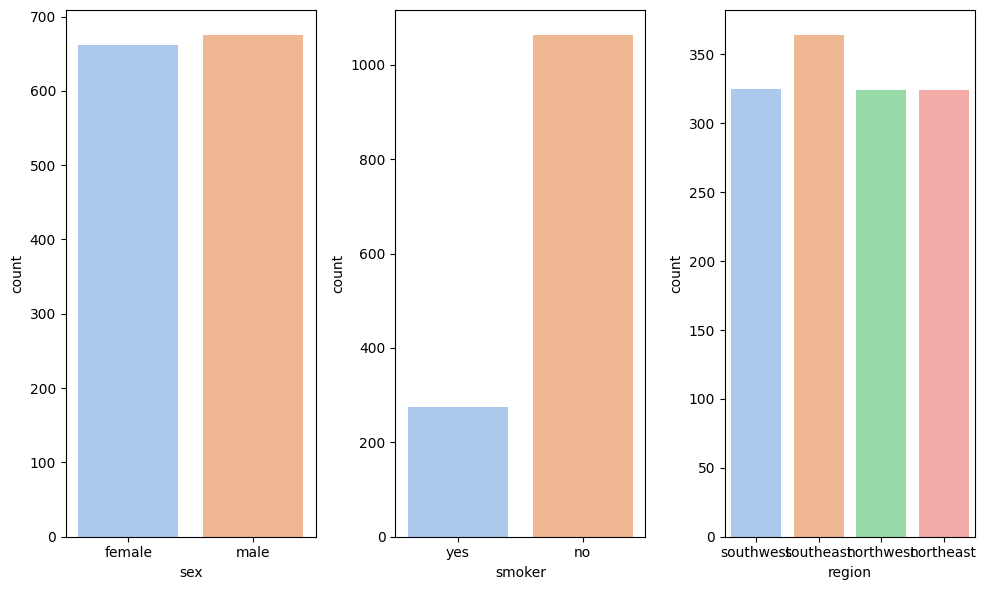

In [12]:
fig, axis = plt.subplots(1, 3, figsize = (10, 6))

sns.countplot(ax = axis[0], data = df, x = "sex", palette='pastel', hue= "sex", legend=False)
sns.countplot(ax = axis[1], data = df, x = "smoker", palette='pastel', hue= "smoker", legend=False)
sns.countplot(ax = axis[2], data = df, x = "region", palette='pastel', hue= "region", legend=False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Podemos observar que el género de los clientes se distribuyen bastante uniformemente, al igual que la region (habiendo un pequeño mayor porcentaje de clientes que residen en el sudeste de USA.)
- La gran mayoría de los clientes son no fumadores.

Variables numéricas:

- age: Edad del beneficiario principal.
- bmi: Índice de masa corporal.
- children: Número de dependientes cubiertos por un seguro médico.	
- charges: Prima del seguro médico.

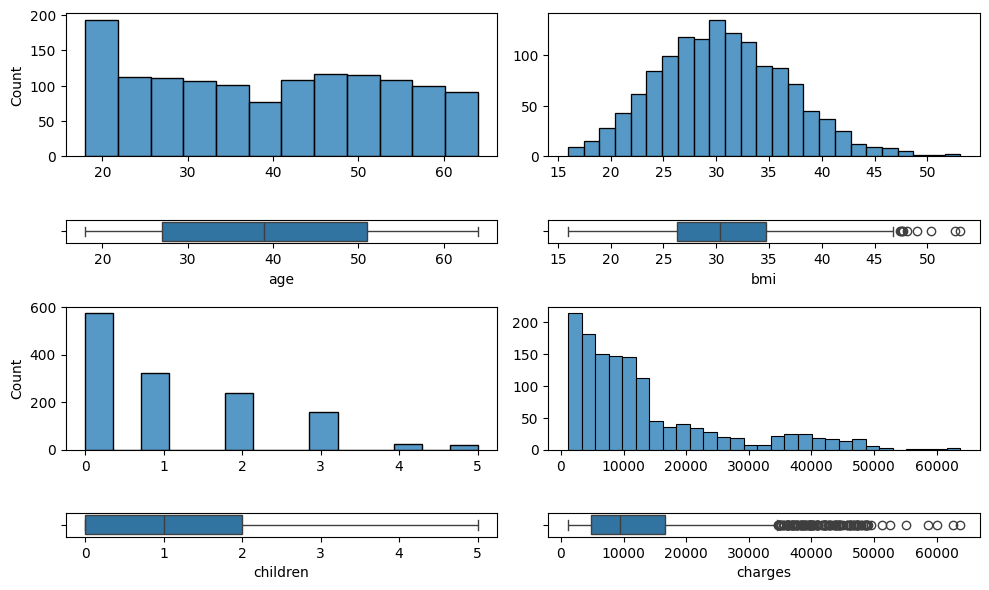

In [13]:
fig, axis = plt.subplots(4, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")

sns.histplot(ax = axis[2, 0], data = df, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "children")

sns.histplot(ax = axis[2, 1], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Hay aproximadamente un 50% más de clientes que rondan los 20 años con respecto a los que rondan los 30, 40, 50 y 60 años, que se distribuyen de manera uniforme.
- El índice de masa corporal tiene una distribución normal, con una media aproximada de 30.
- La mayoría de los clientes no tienen hijos cubiertos por el seguro médico, y va decreciendo la cantidad hasta llegan a unos pocos clientes que tienen entre 4 o 5 hijos con cobertura.
- En general los clientes tienen a contratar un seguro médico con una prima baja.
- No encontramos valores atípicos en la edad ni en la cantidad de hijos con cobertura.

### Análisis multivariante

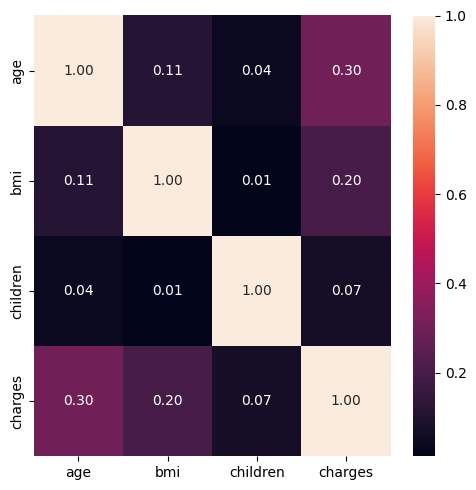

In [14]:
fig, axis = plt.subplots(figsize = (5, 5))

sns.heatmap(df[["age", "bmi", "children", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

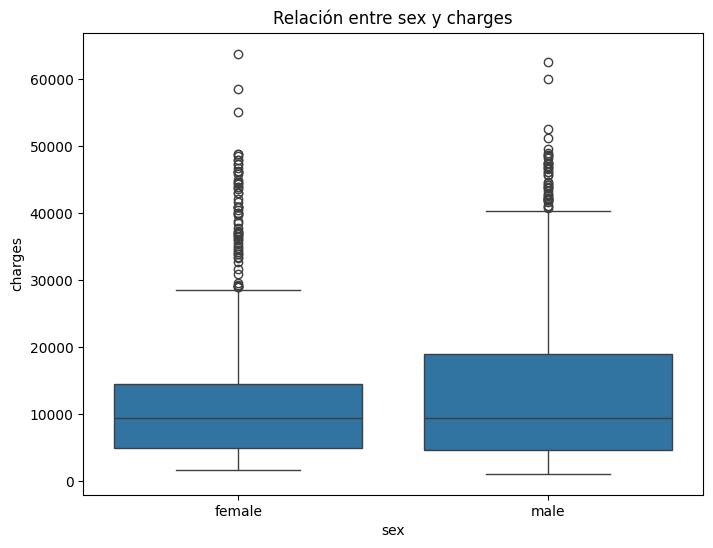

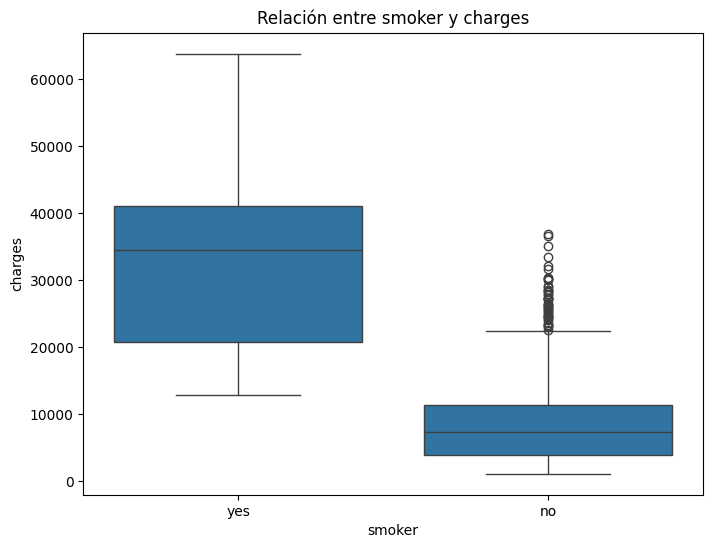

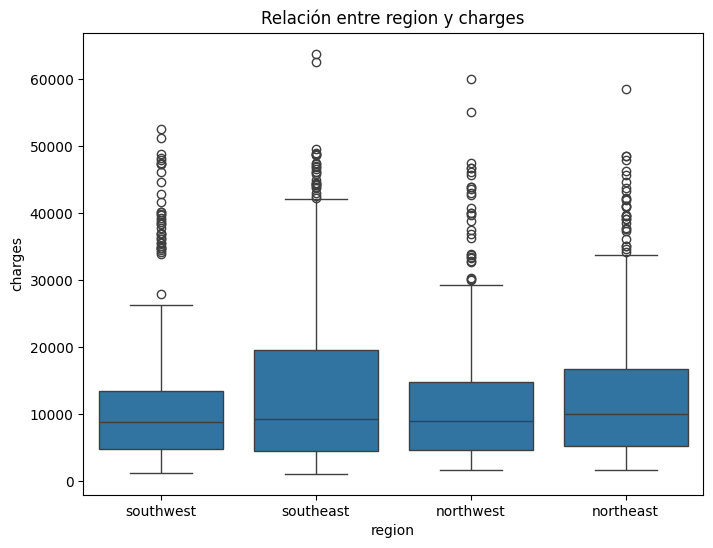

In [16]:
# 2. Boxplots para analizar las variables categóricas
categorical_vars = ['sex', 'smoker', 'region']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=var, y='charges')
    plt.title(f'Relación entre {var} y charges')
    plt.xlabel(var)
    plt.ylabel('charges')
    plt.show()